In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Spam Detection Project/Spam_Detection_Dataset_214843.csv', encoding='latin-1')

In [3]:
df.head(25)

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
5,Spam,img src escapenumberd http loan co kr img emai...
6,Ham,attached is the weekly deal report from 10 / 1...
7,Ham,this is the version that we created earlier th...
8,Ham,pulp writing printing paper escapenumber escap...
9,Ham,stefan metze metzmacher writes stefan metze m...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [5]:
df.shape

(193852, 2)

In [6]:
df.isnull().sum()

,0
label,0
text,2


In [7]:
null_entries = df[df.isnull().any(axis=1)]

In [8]:
null_entries

,label,text
47294,Spam,NaN
149214,Ham,NaN


In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

,0
label,0
text,0


In [11]:
df.shape

(193850, 2)

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

def clean_text(text):
    # Check if the input is a string before applying regex
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        text = ' '.join([word for word in tokens if word not in stop_words])
        text = re.sub(' +', ' ', text)
        return text
    # If not a string, return it as is (or handle it differently as needed)
    return text

df['text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
df.head(10)

,label,text
0,Spam,viiiiiiagraaaa ones want make scream prodigy s...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom ne eds escapenumber ch n b e th n f ...
3,Spam,start increasing odds success live sexually he...
4,Ham,author jra date escapenumber escapenumber esca...
5,Spam,img src escapenumberd http loan co kr img emai...
6,Ham,attached weekly deal report 10 18 01 10 24 01 ...
7,Ham,version created earlier afternoon using enas s...
8,Ham,pulp writing printing paper escapenumber escap...
9,Ham,stefan metze metzmacher writes stefan metze me...


In [14]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

       label                                               text
380      Ham  david marla going track issues know trying bes...
499      Ham  steve dave spoke martha directly advised meeti...
625      Ham  original message williams robert c sent friday...
1349     Ham  escapenumberth best escapenumber escapenumber ...
1502    Spam  cescapenumber cc bescapenumber cc cescapenumbe...
...      ...                                                ...
193844   Ham  original message ntops insync net mailto ntops...
193845   Ham  compiling list everyones personal email addres...
193846   Ham  sorry tim discovered bug conversion truequote ...
193850  Spam  thank loan request recieved escapenumber escap...
193851   Ham  automatically generated delivery status notifi...

[52379 rows x 2 columns]
Number of duplicate rows: 52379


In [15]:
df.drop_duplicates(keep='first', inplace=True)

In [16]:
df.shape

(141471, 2)

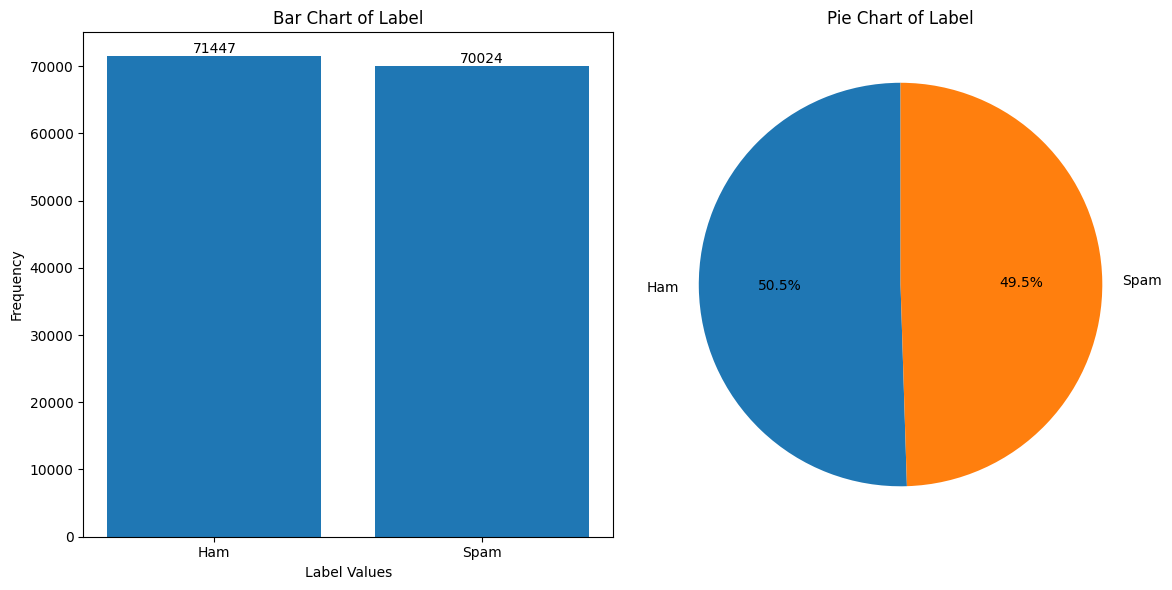

In [17]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'label' is the column for the chart
label_counts = df['label'].value_counts()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
ax1.bar(label_counts.index, label_counts.values)
ax1.set_title('Bar Chart of Label')
ax1.set_xlabel('Label Values')
ax1.set_ylabel('Frequency')

# Add value labels to the bars
for i, v in enumerate(label_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', va='bottom')

# Pie chart
ax2.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Pie Chart of Label')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

In [20]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

# 2. Pad the sequences
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['label_encoded'], test_size=0.2, random_state=42
)


# 4. Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=max_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 5. Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
3537/3537 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9346 - loss: 0.1539 - val_accuracy: 0.9790 - val_loss: 0.0610
Epoch 2/50
3537/3537 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9883 - loss: 0.0349 - val_accuracy: 0.9796 - val_loss: 0.0619
Epoch 3/50
3537/3537 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9955 - loss: 0.0156 - val_accuracy: 0.9796 - val_loss: 0.0732
Epoch 4/50
3537/3537 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9973 - loss: 0.0097 - val_accuracy: 0.9799 - val_loss: 0.0923
Epoch 5/50
3537/3537 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9983 - loss: 0.0062 - val_accuracy: 0.9789 - val_loss: 0.1086
Epoch 6/50
3537/3537 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9988 - loss: 0.0048 - val_accuracy: 0.9787 - val_loss: 0.1275
Epoch 7/50
3537/3537 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9986 - loss: 0.0050 - val_accuracy: 0.9778 - val_loss: 0.1402
Epoch 8/50
3537/3537 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9988 - loss: 0.004

In [21]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.6620
Test Accuracy: 0.9784


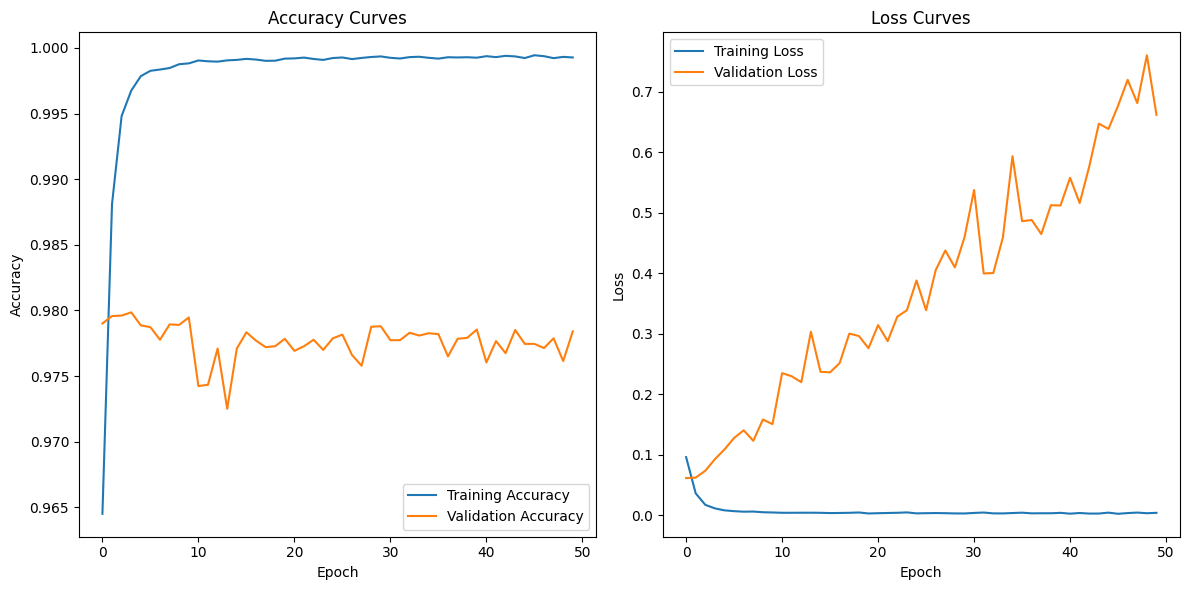

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


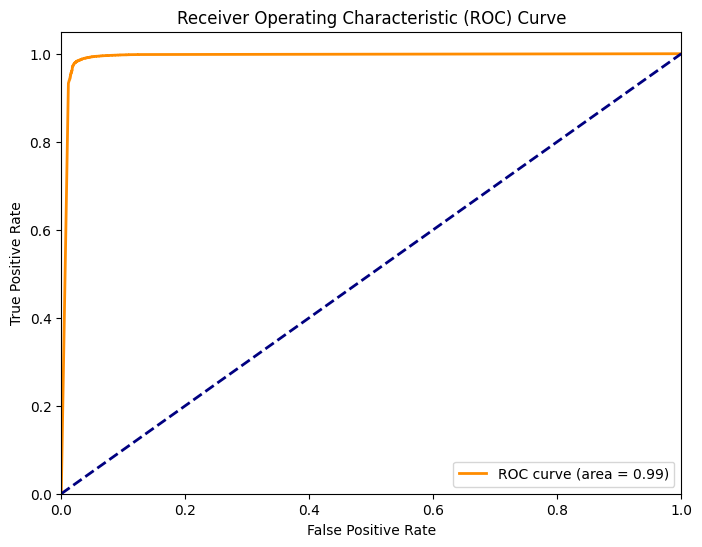

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_probs = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


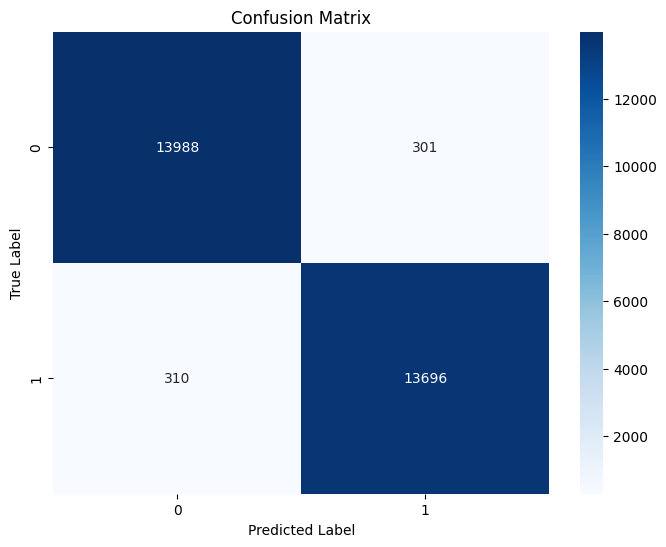

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Get predicted labels
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)  # Convert probabilities to labels (0 or 1)

# 2. Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# 3. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [32]:
!pip install lime

import lime
import lime.lime_tabular
import numpy as np
word_index = tokenizer.word_index
num_features = min(len(word_index), 10000)  # Limit to vocabulary size or maximum features
feature_names = [word for word, index in word_index.items() if index <= num_features]
feature_names = ['feature_' + str(i) for i in range(X_train.shape[1])]  # Generating feature names
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,  # Replace with your training data
    feature_names=feature_names,  # Use the generated feature names
    class_names=['spam', 'not_spam'],  # Replace with your class names
    discretize_continuous=True
)
def predict_fn(x):
    probs = model.predict(x)
    return np.array([(1 - probs).ravel(), probs.ravel()]).T
i = 0
exp = explainer.explain_instance(X_test[i], predict_fn, num_features=10) # Use modified predict_fn
exp.show_in_notebook(show_table=True, show_all=False)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [33]:
!pip install lime
import lime
import lime.lime_tabular
import numpy as np
word_index = tokenizer.word_index
num_features = min(len(word_index), 10000)  # Limit to vocabulary size or maximum features
feature_names = [word for word, index in word_index.items() if index <= num_features]
feature_names = ['feature_' + str(i) for i in range(X_train.shape[1])]  # Generating feature names

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,  # Replace with your training data
    feature_names=feature_names,  # Use the generated feature names
    class_names=['spam', 'not_spam'],  # Replace with your class names
    discretize_continuous=True
)

def predict_fn(x):
    probs = model.predict(x)
    return np.array([(1 - probs).ravel(), probs.ravel()]).T  # LIME expects probabilities for all classes

for i in range(5):  # Visualize explanations for 5 test samples
    exp = explainer.explain_instance(X_test[i], predict_fn, num_features=10) # Use modified predict_fn
    exp.show_in_notebook(show_table=True, show_all=False)
    print("-" * 50)  # Separator between samples

Output hidden; open in https://colab.research.google.com to view.